# Exercise 2

**Organise the data in different ways using dictionaries.**

Reference: dictionary.ipynb

In [4]:
from datetime import datetime
from pytz import timezone
from pytz import utc
from ROOT import TCanvas, TGraph
from array import array


In [5]:
tz = "Europe/Berlin"
local = timezone (tz)

In [6]:
doc = open("bme680.dat", "r")

In [7]:
data = doc.read().splitlines()

In [8]:
temperature = {}
humidity = {}
pressure = {}

In [9]:
for line in data:
    column = line.split()

    date = column[0]
    time = column[1]

    year = int(date.split('-')[0])
    month = int(date.split('-')[1])
    day = int(date.split('-')[2])
  
    hour  = int(time.split(':')[0])
    minutes  = int(time.split(':')[1])
    seconds  = int(float(time.split(':')[2]))
    
    local_datetime = local.localize(datetime(year, month, day, hour, minutes, seconds))
    utc_datetime = local_datetime.astimezone(utc)
    unixtime = utc_datetime.replace(tzinfo=utc).timestamp()
    
    temperature[unixtime] = float(column[2])
    humidity[unixtime] = float(column[3])
    pressure[unixtime] = float(column[4])
   

In [10]:
C1 = TCanvas('Canv', 'Test', 200, 10, 1000, 700)

In [11]:
x,y = array('d'), array('d')
for time,temp in temperature.items():
    x.append(time)
    y.append(temp)

In [18]:
n = len(x)

In [19]:
gr = TGraph(n, x, y)

In [20]:
gr.GetXaxis().SetTimeDisplay(1)
gr.GetXaxis().SetTimeFormat("%Y/%m/%d %H:%M:%S %F1970-01-01 00:00:00");
gr.GetXaxis().SetNdivisions(405)

In [21]:
gr.SetLineWidth(2)
gr.SetLineColor(4)
gr.SetTitle("Test graph")
gr.GetXaxis().SetTitle("Timestamp")
gr.GetYaxis().SetTitle("Temperature")

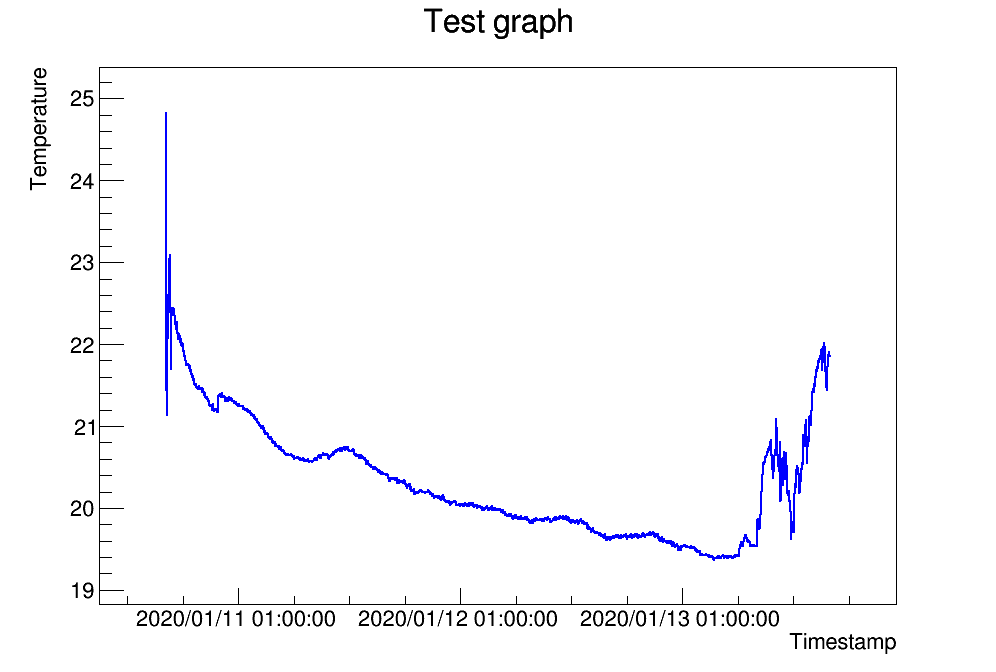

In [22]:
C1.Draw()
gr.Draw( 'AC' )